<a href="https://colab.research.google.com/github/VladimirApter/logica_course_2025/blob/main/Logic_Programming_2025_MidTerm_Exam_by_Vladimir_Apter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logic Programming for Data Analysis 2025: MidTerm Exam

_Владимир Аптер_

_vova.apter@yandex.ru_

Original data source: https://www.kaggle.com/rounakbanik/the-movies-dataset


## [Submission form](https://docs.google.com/forms/d/e/1FAIpQLScvGA5u31bOv-q_GzRUZngz4jH-GxmkCKQcMUWM7Q09f2s7cw/viewform?usp=publish-editor) 🫲 Сдавать контрольную тут

## Movies database
Movie database consists of three tables:

1. `movies.metadata(movie_id: <id of the movie>, original_title: <name of the movie>)`

2.
```
movies.credits(movie_id: <id of the movie>,
                  cast: <actors of the movie>,
                  crew: <crew of the movie>)
```
`crew` and `cast` are lists of records.
In records of `crew` we are interested in fields: `name` -- name of the person, `department` -- department of their work and `job` -- their specific job.
In records of cast we are interested in fields: `name` -- name of the person, `character` -- which character they played.

3. `movies.ratings(user_id: <id of user>, movie_id: <id of the movie>, rating: <rating that user gave>)`


## Movie database problems


1. (4 points) Write predicate `CameronActor(person)` which is true for people who acted in movies which were directed by _James Cameron_.
2. (4 points) Write predicate `JackieMovie(movie:, character:)`, which holds for movies and characters such that _Jackie Chan_ played the character in the movie.
3. (4 points) Write predicate `ArnoldDirector(person)`, which holds people who directed movies, where _Arnold Schwarzenegger_ acted. Person directs a movie if they are part of the crew with the job equal to _Director_.
4. (10 points) Write predicate `RoboCopWifeRoles(movie:, character:)`. It should contain movies and characters which were played by an acress who played character _Murphy's wife_ in the movie _RoboCop_. Assume that you don’t know the name of the acress (even if you do) and write the predicate using string literals _Murphy's wife_ and _RoboCop_, but not the acress's name.
5. (10 points) Write predicate `Contributed(person, movie)`, which holds if the person acted in the movie, or was in the crew. Make this predicate be written to the database when used in other predicates. Use this predicate for the following.
  * a) Write predicate `TerminatorOneButNotTwo(person)` which is true for people who contributed to _The Terminator_, but did not contribute to _Terminator 2: Judgment Day_.
  * b) Write predicate `WithArnoldAndBruce(person:, arnold_movie:, bruce_movie:)`, which is true for any person who contributed to `arnold_movie` together with _Arnold Schwarzenegger_ and to `bruce_movie` together with _Bruce Lee_. It’s expected that some people will occur in multiple rows.
6. (5 points) Write predicate `ArnoldCharacterActors(character:, actors:)`, which tells us for each character that _Arnold Schwarzenegger_ played, who else played the character. Actors should be a list of actor names that played the character, for each list, each actor must be mentioned at most once.
Note: Character is to be treated formally, e.g. it is expected that for character “Himself” all male actors who played themselves to be listed.
7. (10 points)  Usage of distinct denoted predicates is not allowed for this problem. Solve the following problem with aggregating expressions, using original data as input.
Write predicate `DirectorInfo(movie:, directors:, directors_played_characters:)`, which would have a row for each movie (you can assume that every movie has metadata and credits). Field `directors` is a list of people who directed the movie and field `directors_played_characters` is a list of characters (potentially empty) that were played by the directors of the movie.  Recall that a Person directs a movie if they are a member of the crew with the job equal to “Director”.
8. (15 points) Usage of `distinct` denoted predicates is not allowed for this problem. Recall that predicate with aggregation in the value is considered distinct denoted too. Solve the following problem with aggregating expressions, using original data as input.
Write predicate
`MovieInfo(movie:, contributors:, contributions_num:, contributors_count:)`, which has a row for each movie in the original database. Field contributors is a list of records `{name:, contribution:}` for each person who is an actor or a member of the crew. If person is a member of the crew then contribution should be equal to department of their crew list record. If person is an actor then contribution should be equal to “actor”.
Make this predicate be written into the database, when used by other predicates.
9. (3 points) Define a predicate `MovieWorkflow()`, execution of which initiates pipeline, which writes predicates `Contributed` and `MovieInfo` into the database.

## Mathematics and Dynamic Programming


10. (10 points) Write concrete predicate `PrimeDividerCount(number) = divider_count`, where number is each integer number from 1 to 100 and `divider_count` is the number of distinct prime divisors of the number, e.g. 12 has 2 dividers (which are 2 and 3), and 7 has 1 divider (which is 7). Every number from 2 to 100 inclusive must be present in the predicate. _Recursion is not needed here._


See sample data for this problem in the end of colab. Use recursion to solve these problems.

11. (15 points) Write predicate `BestCut(slices:, income:)` with the optimal solution of rod cutting problem.
In this problem we are given length of a rod in predicate `RodLength`
and market prices of rod pieces in predicate `RodPrice`. We need to find cut of the rod
that maximizes our revenue, i.e. total price of all slices. List of slices is to be
stored in `slices` argument and total income in the `income` argument.

12. (10 points) Find how a `Target` can be broken into smallest number of `Word`s. Write predicate `Slicing() = pieces` where `pieces` would be a list of words into which target is broken.

In [1]:
!gdown https://drive.google.com/uc?id=1kB2OlRH9nAb4UB9IWfR3RbvmOfwlsnVu

Downloading...
From: https://drive.google.com/uc?id=1kB2OlRH9nAb4UB9IWfR3RbvmOfwlsnVu
To: /content/midterm_data.tar.gz
100% 23.4M/23.4M [00:00<00:00, 35.0MB/s]


In [2]:
!tar -xzvf midterm_data.tar.gz

midterm_data.sql


In [3]:
!git clone -b ti2023 https://github.com/evgskv/logica
from logica import colab_logica
colab_logica.PostgresJumpStart()

Cloning into 'logica'...
remote: Enumerating objects: 5453, done.
remote: Counting objects: 100% (1181/1181), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 5453 (delta 1062), reused 1033 (delta 1019), pack-reused 4272 (from 2)
Receiving objects: 100% (5453/5453), 6.73 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (3606/3606), done.
Installing and configuring an empty PostgreSQL database.
Installation succeeded. Connecting...
Connected.


In [4]:
import pandas
pandas.set_option('display.max_colwidth', 1000)

In [5]:
!PGPASSWORD=logica psql -U logica -d logica -h localhost -f midterm_data.sql -v ON_ERROR_STOP=1

SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

SET
SET
SET
SET
CREATE SCHEMA
ALTER SCHEMA
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
CREATE TYPE
ALTER TYPE
SET
SET
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
COPY 43018
COPY 45463
COPY 2650582


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Stats_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (name te

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Stats variable.


,movies_count,credits_count,ratings_count
0,45463,43018,2650582


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at SomeRatings_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at SomeRatings variable.


,user_id,movie_id,rating
0,10,150,4.0
1,10,153,3.0
2,10,165,4.0
3,10,296,5.0
4,10,344,4.0
5,10,349,5.0
6,10,380,5.0
7,10,457,4.0
8,10,588,5.0
9,10,590,3.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at SomeCredits_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at SomeCredits variable.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at SomeMovies_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (na

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at SomeMovies variable.


,movie_id,original_title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
5,949,Heat
6,11860,Sabrina
7,45325,Tom and Huck
8,9091,Sudden Death
9,710,GoldenEye


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at CameronActor_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at CameronActor variable.


,person,logica_value
0,강계열,False
1,조병만,False
2,2 Chainz,False
3,50 Cent,False
4,6 Wing,False
5,9 Million Sam,False
6,A. Abayeva,False
7,Aacharya Ravi,False
8,Aada Hämes,False
9,Aadarsh Balakrishna,False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at JackieMovie_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at JackieMovie variable.


,movie,character
0,The Forbidden Kingdom,Old Hop / Lu Yan
1,Rush Hour,Chief Inspector Lee
2,Dragon Lord,Dragon
3,Rush Hour 3,Chief Insp. Lee
4,Rush Hour 2,Chief Insp. Lee
5,Shanghai Knights,Chon Wang
6,Shanghai Noon,Chon Wang
7,我是誰,Lee / Who am I
8,警察故事,Chan Ka Kui
9,警察故事4之簡單任務,Insp. Chan Ka Kui


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ArnoldDirector_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ArnoldDirector variable.


,person
0,Alan Taylor
1,Andrew Davis
2,Arthur Allan Seidelman
3,Bob Rafelson
4,Brian Levant
5,Chris Bell
6,Chuck Russell
7,David Ayer
8,Dick Lowry
9,Elliott Lester


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at RoboCopWifeRoles_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at RoboCopWifeRoles variable.


,movie,character
0,Hard Promises,Bachelorette Party Guest
1,The River Rat,Joyce
2,RoboCop 2,Ellen Murphy
3,RoboCop,Murphy's wife


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Contributed_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (n

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Contributed variable.


,col0,col1
0,Turo Pajala,Ariel
1,Susanna Haavisto,Ariel
2,Matti Pellonpää,Ariel
3,Eetu Hilkamo,Ariel
4,Matti Pellonpää,Varjoja paratiisissa
5,Jukka-Pekka Palo,Varjoja paratiisissa
6,Pekka Laiho,Varjoja paratiisissa
7,Kylli Köngäs,Varjoja paratiisissa
8,Esko Nikkari,Varjoja paratiisissa
9,Sakari Kuosmanen,Varjoja paratiisissa


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at TerminatorOneButNotTwo_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord1106

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at TerminatorOneButNotTwo variable.


,col0
0,Bruce M. Kerner
1,Shawn Schepps
2,Joe Farago
3,Dick Miller
4,Franco Columbu
5,Greg Robbins
6,Patrick Pinney
7,John E. Bristol
8,Wayne Stone
9,James Ralston


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at WithArnoldAndBruce_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord11066498

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at WithArnoldAndBruce variable.


,person,arnold_movie,bruce_movie
0,Aaron Williams,Conan the Barbarian,The Green Hornet
1,Christopher Lee,Around the World in 80 Days,Circle of Iron
2,Chuck Norris,The Expendables 2,Bruce Lee: A Warrior's Journey
3,Chuck Norris,The Expendables 2,Bruce Lee: The Legend
4,Chuck Norris,The Expendables 2,I Am Bruce Lee
5,Chuck Norris,The Expendables 2,The Wrecking Crew
6,Chuck Norris,The Expendables 2,死亡遊戲
7,Chuck Norris,The Expendables 2,猛龍過江
8,Colleen Camp,Last Action Hero,死亡遊戲
9,David Carradine,The Long Goodbye,Circle of Iron


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ArnoldCharacterActors_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord11066

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ArnoldCharacterActors variable.


,character,actors
0,Lars,"[Philipp Hochmair, Christian Pagh, Christian Pagh, László Áron, Daniel Roesner, Mijail Verona, Brian Glover, Kevin Heffernan, Christian Rubeck, Claes Bang, Gil Kazimirov, Lars Brygmann, Mads Keiser, Jens Andersen, Martin Skaug, Christopher Lawford, Sascha Rosemann, Thure Lindhardt, Thure Lindhardt, Penn Badgley, Anthony Fiorino, Donald Sutherland, Frank Darien, Joel Saeks, Kim Bodnia, Steven van Niekerk, Alexis Arquette, Jørgen Langhelle, Janne 'Loffe' Carlsson, Patrick Johnson, Mikael Persbrandt, Brian Geraghty, Thure Lindhardt, Sven-Bertil Taube, Shaun Henrik Matheson, Christopher Lloyd, Bengt Brunskog, Alexander Hanson, Mijail Verona, Doug McGrath, Benjamin Easterday, Bjarne Henriksen, Lars Hjortshøj, Torkel Petersson, Christian Rubeck]"
1,Arnold,"[Samuel L. Jackson, Bob Larson, Reed Buck, Richard Marcus, Ryan Pinkston, Cary Elwes, Scott Thomson, James Burke, Spencer Klein, Bubba Smith, Jean-Claude Guilbert, Rif Hutton, Darren Ewing, Jon Gries, Mirosław Zbrojewicz, Larry Udy, Paul Mazursky, David Costabile, Evgeniy Stychkin, James Randolph Kuhl, John Bluethner, Victor Garber, Tracey Walter, Clovis Cornillac, John Dunsworth, Edward Fielding, William Dreyer, Charles Bickford, Joe Pingue, Bruce Kimmel, Richard Lund, Manobala]"
2,Conan,"[Christopher Doyle, Danny Masterson, 杰森·莫玛, Conan Stevens]"
3,Himself,"[Michael Hynson, Chuck Gardner, Robert August, Wayne Miyata, Lord 'Tally Ho' Blears, Chip Fitzwater, Tom Jones, Dallas Gilbert, Wayne Burton, Hugh M. Hefner, Rock Scully, Ike Turner, Roland Schneider, Sonny Barger, Melvin Belli, Dick Carter, Sam Cutler, Robert F. Kennedy, John F. Kennedy, Hubert H. Humphrey, Robert Drew, Alan Price, Tito Burns, Donovan, Derroll Adams, Bob Dylan, Albert Grossman, Bob Neuwirth, H.B. Warner, Jay Livingston, Ray Evans, Cecil B. DeMille, Buster Keaton, Bruce Willis, Pat Kiernan, Vanilla Ice, Mark McGrath, Bruce Springsteen, Victor Borge, Tony Randall, Ed Herlihy, Pat O'Brien, Dave Chappelle, Mr. T, Akshaye Khanna, Werner Herzog, David Letterman, Timothy Treadwell, Jewel Palovak, Warren Queeney, Willy Fulton, Sam Egli, Alan Keyes, Bob Barr, Casey Kasem, Joe Franklin, Larry King, Roger Grimsby, Jean Cocteau, Larry King, Leon Harris, Geraldo Rivera, Jay Leno, Alex Trebek, Jerry Dunphy, Jerry Vale, Henny Youngman, Donald Trump, John Patrick Amedori, Dick Eklund, Ozzy Osbourne, H.V. Kaltenborn, Drew Pearson, Elmer Davis, Michael J. Dyer, Frank Wills, Mario Andretti, Leonard Maltin, Hulk Hogan, Wim Wenders, Yohji Yamamoto, George Carlin, Doug Stanhope, Henry Rollins, Jeff Ho, Jake Phelps, Tony Alva, Jeff Ament, Tony Hawk, Steve Caballero, Jean-Pierre Léaud, Jean-Pierre Kalfon, Stephen Hawking, Joe Frazier, Justin Bond, Michael Moore, George H. W. Bush, George W. Bush, Dick Clark, Bill Clinton, ...]"
4,Bar Patron,"[Ray Harryhausen, Arthur Hiller, Leroy Swadley, Michaelangelo Graziano, Edward M. Kelahan, Rick Duplissie, Boyd Banks, Lawrence Bender, Johnny Bartee, Raymond Storti, Bill Rowe, Tracy Roberts, Jerry Wu, Jeffery Feaster, John F. Buchmelter III, Rich Komenich, Gia Franzia, Christopher Breslin, Dave Colon, Bob Brzuchalski, Dave Allen, Bill Stinchcomb, Stephanie Ericsson, Carson Taylor, Stephen Eiland, Jonathan Winfrey, Douglas Carlson, Ernesto Molinari, Nick Borgani, Jerry Frank, Kenner G. Kemp, Bess Flowers, Greg Bronson, Eva Ford, Randal Bruce, David Cosey, David Lunsford, Barbara Elizabeth Maleski, Carmine Perrelli, Kristoffer Kjornes, Gil Zabarsky, James Paul, Joseph Blackstone, Brett Nielsen, Frank Orth, Holly Ladnier, Roland Matthews, Ryan Don Devey, Preston Gibbs, Mark Oliphant, Christian Purser, Brandon Anderson, Gloria Hansen, Ross Howard, David Turley, Chris Larsen, Nathan Harward, Erik Madsen, Erich Cannon, Valeria Madsen, Monica Acosta, Richard Carmona, Raymond Franke, Charlie Ebbs, Tyrell Witherspoon, Meghan Anne Riley, David Michael Fordham, Max Napolitano, Harold Miller, Victor McGuire, Judah Friedlander, Miltos Yerolemou, James Tracy, Glen Warner, Cory Tyn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at DirectorInfo_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at DirectorInfo variable.


,movie,directors,directors_played_characters
0,Ariel,[Aki Kaurismäki],[]
1,Varjoja paratiisissa,[Aki Kaurismäki],[]
2,Four Rooms,"[Quentin Tarantino, Robert Rodriguez, Alexandre Rockwell, Allison Anders]",[Chester Rush]
3,Judgment Night,[Stephen Hopkins],[]
4,Star Wars,[George Lucas],[]
5,Finding Nemo,[Andrew Stanton],[Crush (voice)]
6,Forrest Gump,[Robert Zemeckis],[]
7,American Beauty,[Sam Mendes],[]
8,Citizen Kane,[Orson Welles],[Charles Foster Kane]
9,Dancer in the Dark,[Lars von Trier],[]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at MovieInfo_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as (nam

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at MovieInfo variable.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at MovieWorkflow_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
-- Logica type: logicarecord110664987
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord110664987') then create type logicarecord110664987 as 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at MovieWorkflow variable.


,atom
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

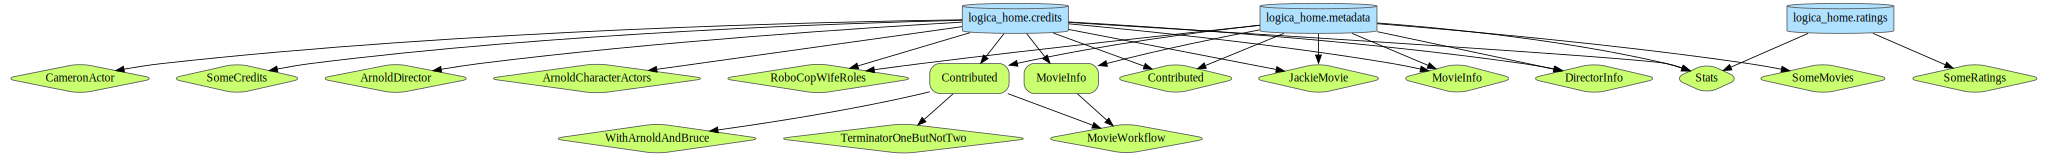

Running predicate: ArnoldCharacterActors (677 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: Contributed

/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


 (3483 ms)
Running predicate: JackieMovie (174 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: MovieInfo

/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


 (15164 ms)
Running predicate: CameronActor

/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


 (2563 ms)
Running predicate: SomeCredits (158 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: ⤓MovieInfo (4236 ms)
Running predicate: DirectorInfo

/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


 (1414 ms)
Running predicate: RoboCopWifeRoles (706 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: ⤓Contributed (1640 ms)
Running predicate: ArnoldDirector (343 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: Stats (816 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: TerminatorOneButNotTwo (9482 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: SomeRatings (6 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: SomeMovies (4 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: MovieWorkflow

/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


 (3526 ms)
Running predicate: WithArnoldAndBruce (1645 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
%%logica Stats, SomeRatings, SomeCredits, SomeMovies, CameronActor, JackieMovie, ArnoldDirector, RoboCopWifeRoles, Contributed, TerminatorOneButNotTwo, WithArnoldAndBruce, ArnoldCharacterActors, DirectorInfo, MovieInfo, MovieWorkflow

@Limit(SomeRatings, 100);
SomeRatings(..r) :- logica_home.ratings(..r);

@Limit(SomeCredits, 100);
SomeCredits(..r) :-
  logica_home.credits(..r),
  r ~ {movie_id: Num,
       cast: [{name: Str, character: Str}],
       crew: [{name: Str, job: Str, department: Str}]};

@Limit(SomeMovies, 100);
SomeMovies(..r) :- logica_home.metadata(..r);

Stats(movies_count:,
      credits_count:,
      ratings_count:) :-
  movies_count += (1 :- logica_home.metadata()),
  credits_count += (1 :- logica_home.credits()),
  ratings_count += (1 :- logica_home.ratings());


# --- 1 ---

CameronActorCount(person:, roles_count? += 0) distinct :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    actor.name == person;
CameronActorCount(person:, roles_count? += 1) distinct :-
    logica_home.credits(movie_id:, cast:, crew:),
    crew_member in crew,
    crew_member.department == 'Directing',
    crew_member.job == 'Director',
    crew_member.name == 'James Cameron',
    actor in cast,
    actor.name == person;

CameronActor(person:) = is_cameron_actor :-
    CameronActorCount(person:, roles_count:),
    is_cameron_actor == roles_count >= 1;


# --- 2 ---

JackieMovie(movie:, character:) :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    actor.name == 'Jackie Chan',
    actor.character == character,
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title;


# --- 3 ---

ArnoldDirector(person:) distinct :-
    logica_home.credits(movie_id:, cast:, crew:),
    crew_member in crew,
    crew_member.job == 'Director',
    person == crew_member.name,
    actor in cast,
    actor.name == 'Arnold Schwarzenegger';


# --- 4 ---

RoboCopWife(person:) :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    actor.character == "Murphy's wife",
    actor.name == person;

RoboCopWifeRoles(movie:, character:) :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    person == actor.name,
    RoboCopWife(person:),
    actor.character == character,
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title;


# --- 5 ---

@Ground(Contributed);
Contributed(person, movie) :-
    (logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    person == actor.name,
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title) |
    (logica_home.credits(movie_id:, cast:, crew:),
    crew_member in crew,
    person == crew_member.name,
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title);

TerminatorOneButNotTwo(person) :-
    Contributed(person, 'The Terminator'),
    ~ Contributed(person, 'Terminator 2: Judgment Day');

WithArnoldAndBruce(person:, arnold_movie:, bruce_movie:) distinct :-
    Contributed('Arnold Schwarzenegger', arnold_movie),
    Contributed('Bruce Lee', bruce_movie),
    Contributed(person, arnold_movie),
    Contributed(person, bruce_movie);


# --- 6 ---

ArnoldCharacters(character:) distinct :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    actor.name == 'Arnold Schwarzenegger',
    actor.character = character;

ArnoldCharacterActors(character:, actors? List= actor_name) distinct :-
    logica_home.credits(movie_id:, cast:, crew:),
    actor in cast,
    actor.name != 'Arnold Schwarzenegger',
    character == actor.character,
    ArnoldCharacters(character:),
    actor_name == actor.name;


# --- 7 ---

DirectorInfo(movie:, directors:, directors_played_characters:) :-
    empty_list = [], empty_list ~ [Str],
    logica_home.credits(movie_id:, cast:, crew:),
    directors_nullable List= (crew_member.name :- crew_member in crew, crew_member.job == "Director"), directors_nullable ~ [Str],
    directors = if (directors_nullable is null) then empty_list else directors_nullable,
    directors_played_characters_nullable List= (actor.character :- actor in cast, Constraint(actor.name in directors) == true), directors_played_characters_nullable ~ [Str],
    directors_played_characters = if (directors_played_characters_nullable is null) then empty_list else directors_played_characters_nullable,
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title;


# --- 8 ---

@Ground(MovieInfo);
MovieInfo(movie:, contributors:, contributions_num:, contributors_count:) :-
    logica_home.credits(movie_id:, cast:, crew:),
    actors List= ({name: actor.name, contribution: 'actor'} :- actor in cast), actors ~ [{name: Str, contribution: Str}],
    crew_members List= ({name: crew_member.name, contribution: crew_member.department} :- crew_member in crew),
    contributors = actors ++ crew_members,
    contributions_num == Size(contributors),
    contributor_names Set= (contributor.name :- contributor in contributors),
    contributors_count == Size(contributor_names),
    logica_home.metadata(movie_id:, original_title:),
    movie == original_title;


# --- 9 ---

MovieWorkflow() :- MovieInfo(movie:, contributors:, contributions_num:, contributors_count:), Contributed(person, movie);



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at RodPrice_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
END $$;
SELECT * FROM (
  
    SELECT
      5 AS length,
      20 AS price
   UNION ALL
  
    SELECT
      4 AS length,
      15 AS price
   UNION ALL
  
    SELECT
      8 AS leng

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at RodPrice variable.


,length,price
0,5,20
1,4,15
2,8,40
3,2,7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

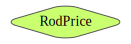

Running predicate: RodPrice (2 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
%%logica RodPrice

# Write predicate `BestCut(slices:, income:)` with the optimal solution of rod cutting problem.
# In this problem we are given length of a rod in predicate `RodLength`
# and market prices of rod pieces in predicate `RodPrice`. We need to find cut of the rod
# that maximizes our revenue, i.e. total price of all slices. List of slices is to be
# stored in `slices` argument and total income in the `income` argument.

RodPrice(length: 5, price: 20);
RodPrice(length: 4, price: 15);
RodPrice(length: 8, price: 40);
RodPrice(length: 2, price: 7);

RodLength(length: 22);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Word_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
END $$;
SELECT * FROM (
  
    SELECT
      'applepie' AS col0
   UNION ALL
  
    SELECT
      'apple' AS col0
   UNION ALL
  
    SELECT
      'banana' AS col0
   UNION ALL
  
    SEL

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Word variable.


,col0
0,applepie
1,apple
2,banana
3,organge
4,pineapple
5,pen
6,pencil
7,piecening
8,applepieceningpenpineappleapplepen


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Target_sql variable.
-- Initializing PostgreSQL environment.
set client_min_messages to warning;
create schema if not exists logica_home;
-- Empty logica type: logicarecord893574736;
DO $$ BEGIN if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord893574736') then create type logicarecord893574736 as (nirvana numeric); end if; END $$;


DO $$
BEGIN
-- Logica type: logicarecord481217614
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord481217614') then create type logicarecord481217614 as (r logicarecord893574736); end if;
-- Logica type: logicarecord86796764
if not exists (select 'I(am) :- I(think)' from pg_type where typname = 'logicarecord86796764') then create type logicarecord86796764 as (s text); end if;
END $$;
SELECT
  'applepieceningpenpineappleapplepen' AS col0;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Target variable.


,col0
0,applepieceningpenpineappleapplepen


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

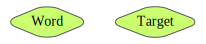

Running predicate: Word (9 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


Running predicate: Target (3 ms)


/content/logica/colab_logica.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(psql_logica.DigestPsqlType)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
%%logica Word, Target

# Find how a `Target` can be broken into smallest number of `Word`s.
# Write predicate `Slicing() = pieces` where `pieces` would be a list
# of words into which target is broken.

Word("applepie");
Word("apple");
Word("banana");
Word("organge");
Word("pineapple");
Word("pen");
Word("pencil");
Word("piecening");
Word(letter) :-
  letter in letters,
  letters = Set{x :- x in Split("applepieceningpenpineappleapplepen", "")};

Target("applepieceningpenpineappleapplepen");